# 使用Tensorflow2.0 來練習基本的回歸問題

In [1]:
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt
import random

2.0.0


## 生成訓練數據集

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = tf.random.normal((num_examples, num_inputs),stddev = 1) # 產生1000 * 2的隨機資料
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b # 產生1000*1的隨機資料 加上bias
labels += tf.random.normal(labels.shape,stddev=0.01)# 加入一些隨機誤差

In [4]:
print(features[:5])
print(labels[:5])

tf.Tensor(
[[-1.0455135  -0.9476626 ]
 [ 1.6217065  -0.07128681]
 [ 0.06007253 -0.5130789 ]
 [ 0.91422284 -0.29680198]
 [-0.1782647  -0.54737294]], shape=(5, 2), dtype=float32)
tf.Tensor([5.316284  7.660902  6.0643578 7.020113  5.6987658], shape=(5,), dtype=float32)


## 繪圖看看feature 2 與 label的關係

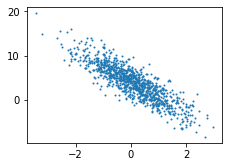

In [5]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

## 接著撰寫一個batch_generator來批次取得資料

In [6]:
import numpy as np
def data_iter(batch_size, features, labels):
    features = np.array(features)
    labels = np.array(labels)
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i:min(i + batch_size, num_examples)])
        yield features[j], labels[j] # 注意這邊用generator的形式 = > 可以重複使用

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

[[ 0.20540231 -0.20866571]
 [ 0.38012448 -0.14420448]
 [ 0.52613884  0.5235153 ]
 [-0.6921469  -1.8433504 ]
 [ 0.39000827 -0.29154515]
 [-0.12131926 -0.3559636 ]
 [ 0.84578836 -0.61975616]
 [ 0.2846853  -0.46345022]
 [-0.56377405 -1.207667  ]
 [ 0.7442343   0.0173178 ]] [5.3193808 5.436061  3.4843934 9.092187  5.9626393 5.175204  8.004184
 6.338442  7.170201  5.631996 ]


## 接著開始初始化Neuron

In [9]:
w = tf.Variable(tf.random.normal((num_inputs, 1),stddev=0.01)) # 初始記得用隨機產生
b = tf.Variable(tf.zeros(1,))

In [11]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.00371535],
       [-0.00532907]], dtype=float32)>

## 定義 Forward Function

In [13]:
def forward(X, w, b):
    return tf.matmul(X, w) + b

In [15]:
forward(X,w,b)

<tf.Tensor: id=117, shape=(10, 1), dtype=float32, numpy=
array([[ 0.00187514],
       [ 0.00218077],
       [-0.00083506],
       [ 0.00725178],
       [ 0.00300268],
       [ 0.00144621],
       [ 0.00644512],
       [ 0.00352747],
       [ 0.00434113],
       [ 0.0026728 ]], dtype=float32)>

## 定義Loss Function

In [21]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 /2

In [22]:
squared_loss(forward(X,w,b), y)

<tf.Tensor: id=158, shape=(10, 1), dtype=float32, numpy=
array([[14.137934],
       [14.763528],
       [ 6.073409],
       [41.268024],
       [17.758635],
       [13.383883],
       [31.981913],
       [20.065569],
       [25.674772],
       [15.844642]], dtype=float32)>

## 定義優化方法

In [23]:
def sgd(params, lr, batch_size):
    for param in params:
#         param[:] = param - lr * t.gradient(l, param) / batch_size (這邊需要回去track一下sgd的算法)
        param.assign_sub(lr * t.gradient(l, param) / batch_size)

## 訓練

In [25]:
lr = 0.03
num_epochs = 3
net = forward
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape(persistent=True) as t:
            t.watch([w,b])
            l = loss(net(X, w, b), y)
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.052627
epoch 2, loss 0.000227
epoch 3, loss 0.000051


In [31]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.9995749],
       [-3.399427 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199158], dtype=float32)>


可以看到訓練出來的w跟b相當的貼近原始數字